<a href="https://colab.research.google.com/github/simonebugo/Big_Data/blob/main/8_1_26.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [86]:
import pandas as pd
import numpy as np

In [87]:
df = pd.read_csv('adult.csv', sep =',')
df.head() #mostra solo le prime 5 righe. se metto head(10) le prime 10...

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


Quante sono le istanze contenute nel dataset?
Il dataset e completo
(cioè per ogni istanza tutti i valori di ogni attributo sono sempre correttamente
specificati _ non esistono "missing values")?
Il dataset è bilanciato per
quanto riguarda la classe da predire? _ (punti 1)

In [88]:
print(f'Numero righe: {df.shape[0]}') #il numero di istanze è il numero di righe
print(f'Numero colonne: {df.shape[1]}') #numero di classi

Numero righe: 32561
Numero colonne: 15


In [89]:
df.isnull().sum() #non esistono valori con Nan però esistono diversi valori "?"

,0
age,0
workclass,0
fnlwgt,0
education,0
education.num,0
marital.status,0
occupation,0
relationship,0
race,0
sex,0


In [90]:
df['income'].value_counts() #il dataset non è bilanciato

,count
income,
<=50K,24720
>50K,7841


Verificare se i lavoratori con laurea (Bachelors, Masters, Doctorate) e età inferiore a 40 anni hanno una probabilità maggiore di reddito >50K rispetto ai lavoratori più anziani con lo stesso livello di istruzione. (punti 2)

In [91]:
df['income_mapped'] = df['income'].map({'<=50K':0,'>50K':1})

grad = df[(df['education']=='Bachelors') | (df['education']=='Masters') | (df['education']=='Doctorate') ]

prob_1 = grad[grad['age'] < 40]['income_mapped'].mean()
prob_2 = grad[grad['age'] >= 40]['income_mapped'].mean()

print(f"prob min 40 {prob_1}")
print(f"prob mag 40 {prob_2}")

#la probabilità di avere un income maggiore di 50 k per gli over 40 è più alta del 24%

prob min 40 0.3437250199840128
prob mag 40 0.5874799357945425


Discretizzare la variabile hours.per.week in 3 fasce (≤30, 31-50, >50). Creare una tabella pivot che mostri la percentuale di redditi >50K per fascia oraria e genere (sex). Chi lavora più ore ha sempre un reddito più alto? Ci sono disparità tra uomini e donne? (punti 3)

In [92]:
#df['hours.per.week_disc'] = df['hours.per.week'].map(lambda x: '≤30' if x <= 30 else '31-50' if 30 < x <= 50 else '>50')

In [93]:
df['hours.per.week_disc']=pd.cut(df['hours.per.week'], bins=[0,30,50,100])

df.pivot_table(index='hours.per.week_disc', columns='sex', values='income_mapped', aggfunc='mean')
#i risultati che osserviamo mostrano che chi lavora più ore ha anche il reddito più alto.
#sono presenti però disparità tra uomini e donne, con gli uomini che guadagnao di più per ogni fascia oraria

/tmp/ipython-input-1036356254.py:3: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df.pivot_table(index='hours.per.week_disc', columns='sex', values='income_mapped', aggfunc='mean')


sex,Female,Male
hours.per.week_disc,,
"(0, 30]",0.060228,0.074941
"(30, 50]",0.120240,0.314060
"(50, 100]",0.204263,0.450974


Analizzare la relazione tra capitale investito (capital.gain) e livello di reddito: confrontare media e mediana di capital-gain per le due classi di reddito (punti 2) e visualizzare in un boxplot la distribuzione dei valori di capital.gain sulle due classi. (punti 2)

In [94]:
df.groupby('income_mapped')['capital.gain'].mean() #la media di capital gain per la classe dei lavorati con reddito inferiore a 50k è estremamente inferiore a quella dei lavoratori
#con reddito superiore a 50k

,capital.gain
income_mapped,
0,148.752468
1,4006.142456


In [95]:
df.groupby('income_mapped')['capital.gain'].median() #osserviamo che la mediana è a 0 per entrambe le classi

,capital.gain
income_mapped,
0,0.0
1,0.0


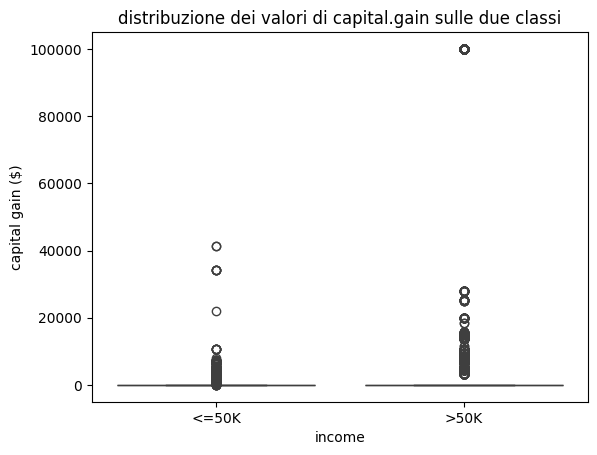

In [96]:
#per i boxplot usa seaborn,
import seaborn as sns
import matplotlib.pyplot as plt


sns.boxplot(x="income", y="capital.gain", data=df)
plt.xlabel("income")
plt.ylabel("capital gain ($)")
plt.title("distribuzione dei valori di capital.gain sulle due classi")
plt.show()

--------------------------------------------
PARTE 2
--------------------------------------------

Si vuole predire la classe di reddito (income). Ricaricare il dataset originale, eliminare eventuali attributi inutili (giustificare la scelta), eliminare le istanze che contengono valori nulli, eliminare eventuali righe duplicate, trasformare opportunamente i valori categorici e dividere il dataset in train (3/4 del dataset) e test (1/4), preservando le proporzioni delle classi nella colonna target.
Confrontare la predizione ottenuta sia sul dataset train sia sul dataset test dai classificatori ExtraTreeClassifier, KNeighborsClassifier e da un dummy classifier a scelta. Effettuare alcune considerazioni sui risultati ottenuti, tenendo in considerazione i valori di F1 e della confusion matrix. (punti 4)

In [97]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.linear_model import LogisticRegression, SGDRegressor, LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.dummy import DummyRegressor
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler, KBinsDiscretizer
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import FeatureUnion
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import FunctionTransformer
from sklearn.metrics import r2_score, mean_squared_log_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer

In [98]:
df = pd.read_csv('adult.csv', sep =',')
#non ci sono attributi inutili
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

le = LabelEncoder() #fa una fit trasf solo per gli object. solo per colonne categoriche
for column in df.columns:
    if df[column].dtype == object:
        df[column] = le.fit_transform(df[column])

X = df.drop('income', axis = 1)
y = df['income'] #y è il target, test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)


In [99]:
models = {'Dummy': DummyClassifier(strategy="most_frequent"),
          'ExtraTree': ExtraTreeClassifier(),
          'KNC': KNeighborsClassifier()}

def test_model(name, model, traindata, testdata, trainlabels, testlabels):
  model.fit(traindata, trainlabels)
  trainpred = model.predict(traindata)
  testpred = model.predict(testdata)
  print(f" ===== {name} =====")
  print(f"acc on train {accuracy_score(trainlabels,trainpred)}")
  print(f"acc on test {accuracy_score(testlabels,testpred)}")
  print(f"F1 on train {f1_score(trainlabels,trainpred)}")
  print(f"F1 on test {f1_score(testlabels,testpred)}")
  print(f"confusion matrix on train \n {confusion_matrix(trainlabels,trainpred)}")
  print(f"confusion matrix on test \n {confusion_matrix(testlabels,testpred)}")

for name, model in models.items():
  test_model(name, model, X_train, X_test, y_train, y_test)


 ===== Dummy =====
acc on train 0.7590771248258339
acc on test 0.7590657652120467
F1 on train 0.0
F1 on test 0.0
confusion matrix on train 
 [[18523     0]
 [ 5879     0]]
confusion matrix on test 
 [[6175    0]
 [1960    0]]
 ===== ExtraTree =====
acc on train 1.0
acc on test 0.7921327596803933
F1 on train 1.0
F1 on test 0.570921086018777
confusion matrix on train 
 [[18523     0]
 [    0  5879]]
confusion matrix on test 
 [[5319  856]
 [ 835 1125]]
 ===== KNC =====
acc on train 0.8343988197688714
acc on test 0.7745543945912723
F1 on train 0.5694192860948322
F1 on test 0.4060880829015544
confusion matrix on train 
 [[17689   834]
 [ 3207  2672]]
confusion matrix on test 
 [[5674  501]
 [1333  627]]


osserviamo i risultati:
- dummy: accuracy buona sia su train e test, il motivo per cui avviene è perchè ha come strategia il most frequent e il nostro è un dataset sbilanciato. assegna ciascun sample alla classe più frequente sempre. dunque accuracy alta ma si possono vedere tutte le debolezze del classificatore osservando la f1 (a 0) e la confusion matrix

- extra tree: ottiene un accuracy del 100% e un f1 del 100% sul train. il valore dell'accuracy sul test rimane buono (circa 80%) mentre l'f1 crolla. ciò può essere sintomo del fatto che il modello overfitti

- KNC: in questo caso otteniamo un accuracy buona sia su train e test, che non ci fa pensare all'overfitting, però osservando sia l'f1 score e la confusion matrix possiamo osservare che il modello non è ottimale

Verificare, nelle predizioni sul dataset di test ottenute dal classificatore
Extra TreeClassifier, se la probabilità di reddito >50K predetta per gli uomini è diversa da quella predetta per le donne (2 punti). Valutare se l'accuratezza di predizione ottenuta eliminando la colonna sex è diversa. Cosa si può osservare da questa valutazione? (2 punti)

In [100]:
y.value_counts()

,count
income,
0,24698
1,7839


In [101]:
#considero le predizioni fatte dal ExtraTreeClassifier allenato prima
et = models['ExtraTree']
y_test_pred = et.predict(X_test)

# Creiamo un mask per le donne e gli uomini nel test set
women_mask = X_test['sex'] == 0
men_mask   = X_test['sex'] == 1

# Probabilità di predizione di status = 1 (percentuale di "1")
women_status_rate = y_test_pred[women_mask].mean()
men_status_rate   = y_test_pred[men_mask].mean()

print(f"Percentuale predetta di reddito >50K tra le donne: {women_status_rate:.2f}")
print(f"Percentuale predetta di reddito >50K tra gli uomini: {men_status_rate:.2f}")

# acc separata per genere
women_acc = accuracy_score(y_test[women_mask], y_test_pred[women_mask])
men_acc   = accuracy_score(y_test[men_mask], y_test_pred[men_mask])

print(f"acc per le donne: {women_acc:.2f}")
print(f"acc per gli uomini: {men_acc:.2f}")

#osservando i risultati possiamo osservare che la percentuale predetta di reddito sup a 50k per le donne
#è più bassa rispetto agli uomini di un 20%. per quanto riguarda le accuracy, per le donne si ha un accuracy più alta

Percentuale predetta di reddito >50K tra le donne: 0.11
Percentuale predetta di reddito >50K tra gli uomini: 0.31
acc per le donne: 0.88
acc per gli uomini: 0.75


In [102]:
#Rimuovere sex e riallenare
X_train_no_sex = X_train.drop('sex', axis=1)
X_test_no_sex = X_test.drop('sex', axis=1)

et_no_sex = ExtraTreeClassifier()
et_no_sex.fit(X_train_no_sex, y_train)
y_train_pred_no_sex = et_no_sex.predict(X_train_no_sex)
y_test_pred_no_sex = et_no_sex.predict(X_test_no_sex)

# Accuracy separata senza sex
fem_acc_no_gender = accuracy_score(y_test[women_mask], y_test_pred_no_sex[women_mask])
male_grad_acc_no_gender   = accuracy_score(y_test[men_mask], y_test_pred_no_sex[men_mask])

print(f"Accuracy donne senza gender: {fem_acc_no_gender:.2f}")
print(f"Accuracy uomini senza gender: {male_grad_acc_no_gender:.2f}")

print(f"acc on train {accuracy_score(y_train,y_train_pred_no_sex)}")
print(f"acc on test {accuracy_score(y_test,y_test_pred_no_sex)}")

#possiamo osservare che le accuracy sulle donne e gli uomini non variano sostanzialmente eliminando l'attributo gender
#per quanto riguarda il modello completo, i risultati rimangono confrontabili con quelli visti senza rimuovere il gender

Accuracy donne senza gender: 0.89
Accuracy uomini senza gender: 0.74
acc on train 1.0
acc on test 0.7918869084204057


A partire dal dataset utilizzato al punto 1, trovare i valori migliori dei parametri criterion e max depth del classificatore ExtraTreeClassifier. Come variano le performance? (punti 2)

In [103]:
df = pd.read_csv('adult.csv', sep =',')
#non ci sono attributi inutili
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

le = LabelEncoder() #fa una fit trasf solo per gli object. solo per colonne categoriche
for column in df.columns:
    if df[column].dtype == object:
        df[column] = le.fit_transform(df[column])

X = df.drop('income', axis = 1)
y = df['income'] #y è il target, test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

In [104]:
param_grid = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [1, 2, 5, 10, 20, 50]
}
gd_dt = GridSearchCV(ExtraTreeClassifier(),
                     param_grid,
                     scoring='accuracy',
                     cv=5,
                     n_jobs=-1)

gd_dt.fit(X_train, y_train)

best_parameters = gd_dt.best_params_
print(best_parameters)

best_dt = gd_dt.best_estimator_
y_test_pred_best_gd = best_dt.predict(X_test)
y_train_pred_best_gd = best_dt.predict(X_train)
acc_train_gd = accuracy_score(y_train, y_train_pred_best_gd)
acc_test_gd = accuracy_score(y_test, y_test_pred_best_gd)
print(f"accuracy on train {acc_train_gd}")
print(f"accuracy on test {acc_test_gd}")

#si può osservare un calo dell'accuracy sul train e una crescita sul test. ciò è sintomo della risoluzione del problema dell'overfitting che avevamo identificato

{'criterion': 'entropy', 'max_depth': 20}
accuracy on train 0.8743545611015491
accuracy on test 0.8207744314689612


Creare una pipeline in cui, a partire dal dataset utilizzato al punto 1, i valori degli attributi age e hours. per. week sono discretizzati in 5 intervalli, le variabili capital. gain e capital. loss sono scalate nell'intervallo 0-1 e tutti gli altri attributi sono lasciati invariati. Applicare il classificatore
ExtraTreeClassifier con i valori migliori dei parametri analizzati nel punto 3 e confrontare i risultati. (punti 3)

In [105]:
df = pd.read_csv('adult.csv', sep =',')
#non ci sono attributi inutili
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

le = LabelEncoder() #fa una fit trasf solo per gli object. solo per colonne categoriche
for column in df.columns:
    if df[column].dtype == object:
        df[column] = le.fit_transform(df[column])

X = df.drop('income', axis = 1)
y = df['income'] #y è il target, test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

In [106]:
col_tran = ColumnTransformer(
    transformers=[
        ('discr', KBinsDiscretizer(n_bins = 5), ["age","hours.per.week"]),
        ('MinMax', MinMaxScaler(),["capital.gain","capital.loss"]),
        ],
    remainder='passthrough'#per lasciare invariati gli altri attributi
)

pipeline = Pipeline(steps=[
                              ('col_tran', col_tran),
                              ('estimator', ExtraTreeClassifier(criterion = 'gini', max_depth = 20))
                             ])

pipeline

Pipeline(steps=[('col_tran',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('discr', KBinsDiscretizer(),
                                                  ['age', 'hours.per.week']),
                                                 ('MinMax', MinMaxScaler(),
                                                  ['capital.gain',
                                                   'capital.loss'])])),
                ('estimator', ExtraTreeClassifier(max_depth=20))])

In [107]:
pipeline.fit(X_train, y_train)
y_pred_pl = pipeline.predict(X_test)
y_acc__test_pl = accuracy_score(y_test, y_pred_pl)
print(f"acc on test {y_acc__test_pl}")

#l'accuracy rimane confrontabile con quella ottenuta precedentemente

acc on test 0.8191763982790412


/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_discretization.py:306: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 1 are removed. Consider decreasing the number of bins.
  warnings.warn(


Creare una pipeline che, a partire dal dataset iniziale, trasforma le colonne testuali in valori numerici, scala le colonne numeriche attraverso lo Standard Scaler e applica il classificatore ExtraTreeClassifier. (punti 3)

In [108]:
df = pd.read_csv('adult.csv', sep =',')

X = df.drop('income', axis = 1)
y = df['income'].map({'>50K': 1, '<=50K': 0})
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

In [109]:
categorical_cols = [cname for cname in X.columns if
                    X[cname].dtype == "object"]

numerical_cols = [cname for cname in X.columns if
                X[cname].dtype in ['int64', 'float64']]

In [110]:
cat_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

# Gestisce i nulli per le colonne numeriche
num_transformer = Pipeline(steps=[
    ('std', StandardScaler())
])

# --- 3. ColumnTransformer ---
coltran = ColumnTransformer(transformers=[
    ("cat", cat_transformer, categorical_cols),
    ("num", num_transformer, numerical_cols)
])

# --- 4. Pipeline Finale ---
pipeline = Pipeline(steps=[
    ("preprocessing", coltran),
    ("estimator", ExtraTreeClassifier())
])
pipeline

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['workclass', 'education',
                                                   'marital.status',
                                                   'occupation', 'relationship',
                                                   'race', 'sex',
                                                   'native.country']),
                                                 ('num',
                                                  Pipeline(steps=[('std',
                                                                   StandardScaler())]),
                                                  ['age', 'fnlwgt',
                                                   'education.num',
                                                   'capital.gain',
                                                   'capital.loss',
                                                   'hours.per.week'])])),
                ('estimator', ExtraTreeClassifier())])

In [111]:
pipeline.fit(X_train, y_train)
y_pred_pl = pipeline.predict(X_test)
y_acc__test_pl = accuracy_score(y_test, y_pred_pl)
print(f"acc on test {y_acc__test_pl}") #l'accuracy sul test set applicando le trasformazioni viste va a calare

acc on test 0.7957253408672154


Ridurre la dimensione del dataset aggiungendo SelectKBest alla pipeline del punto precedente. Valutare con GridSearchCV i valori migliori di k di SelectKBest e dei parametri criterion e max depth del classificatore ExtraTreeClassifier.
Confrontare i risultati con quelli ottenuti precedentemente. (punti 4)

In [112]:
# Definiamo la nuova Pipeline con SelectKBest
pipeline_kbest = Pipeline(steps=[
    ('coltran', coltran),
    ('kbest', SelectKBest()),
    ('estimator', ExtraTreeClassifier())
])
pipeline_kbest

Pipeline(steps=[('coltran',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['workclass', 'education',
                                                   'marital.status',
                                                   'occupation', 'relationship',
                                                   'race', 'sex',
                                                   'native.country']),
                                                 ('num',
                                                  Pipeline(steps=[('std',
                                                                   StandardScaler())]),
                                                  ['age', 'fnlwgt',
                                                   'education.num',
                                                   'capital.gain',
                                                   'capital.loss',
                                                   'hours.per.week'])])),
                ('kbest', SelectKBest()),
                ('estimator', ExtraTreeClassifier())])

In [113]:
parameters = {
    'kbest__k' : [3,5,7,"all"],
    'estimator__criterion': ['gini', 'entropy', 'log_loss'],
    'estimator__max_depth':[1, 2, 5, 10, 20, 50]
}

gd = GridSearchCV(pipeline_kbest, parameters, scoring="accuracy", cv=5)
gd.fit(X_train,y_train)
y_pred = gd.predict(X_test)

print("Migliori parametri:", gd.best_params_)
best_pipeline = gd.best_estimator_

y_pred_gd_pl = best_pipeline.predict(X_test)
y_train_pred_best_pl = best_pipeline.predict(X_train)
acc_train_gd = accuracy_score(y_train, y_train_pred_best_pl)
acc_test_gd = accuracy_score(y_test, y_pred_gd_pl)
print(f"accuracy on train {acc_train_gd}")
print(f"accuracy on test {acc_test_gd}")

#i risultati rimangono confrontabili con quelli dei punti precedenti


Migliori parametri: {'estimator__criterion': 'entropy', 'estimator__max_depth': 20, 'kbest__k': 'all'}
accuracy on train 0.853972153972154
accuracy on test 0.8199238422798182
